#Install dependancies and latest versions


In [4]:
!pip install opencv-python==4.5.3.56 

##Restart Kernel 

In [5]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
import time

#Mount your drive for external storage 

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##Define function for people Counting 

In [30]:

def People_Count(img):
 
  !pip install inflection

  import inflection    # Camel Case
  import cv2
  import numpy as np
  from google.colab.patches import cv2_imshow
  from imutils.video import FPS
  import json
  import time

  def camel(string):
    return inflection.camelize(string, False)
  #CONFIG_FILE = .cfg file for COCO 
  #WEIGHTS_FILE = .weight file for YOLO v4 by COCO dataset
  #COCO.names = .names file which includes all class names 

  # To read darknet module using config file and yolov3 weights
  net = cv2.dnn.readNet("/content/drive/MyDrive/weights/yolov4.weights", "yolov4 (1).cfg")
  classes = []
  with open("/content/coco.names", "r") as f:
      classes = [line.strip() for line in f.readlines()]
  layer_names = net.getLayerNames()
  output_layers = [layer_names[i[0] - 1] for i in net.getUnconnectedOutLayers()]
  colors = np.random.uniform(0, 255, size=(len(classes), 3))
 # Determine number of classes 

  classes = []

  with open('/content/coco.names') as cls:
    classes = cls.read().splitlines()

  #print(classes)
####################    FOR VIDEO UNCOMMENT THIS   ##################################
  # cap = cv2.VideoCapture("/content/6.mp4")
  # codec = cv2.VideoWriter_fourcc(*'XVID')
  # fps =int(cap.get(cv2.CAP_PROP_FPS))
  # cap_width,cap_height = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH)), int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
  # output= cv2.VideoWriter('adpp_is_out_6rd.mp4', codec, fps, (cap_width, cap_height), True)

  # fps= FPS().start()

  # frame_id = 0

  # while True:
  #   #reading video frame by frame and checking for its null condition
  #   _, img= cap.read()
    p = 0  
  #   frame_id+=1
  #   if img is None:
  #     print('Completed')
  #     break
    # getting output layer of darknet

###############################################################################
    height, width,_ = img.shape
    blob = cv2.dnn.blobFromImage(img, 1 / 255.0, (416, 416),swapRB=True, crop=False)
    net.setInput(blob)
    out_names= net.getUnconnectedOutLayersNames()
    layerOutputs = net.forward(out_names)

    # generating detection in the form of bounding box, confidence and class id
    boxes=[]
    confidences=[]
    class_ids=[]

    for out in layerOutputs:
      for detection in out:
        scores = detection[5:]
        class_id = np.argmax(scores)
        confidence = scores[class_id]
        if confidence > 0.3:
          centerX= int(detection[0]* width)
          centerY= int(detection[1]* height)
          w= int(detection[2]* width)
          h= int(detection[3]* height)
          x = int(centerX - (w/ 2))
          y = int(centerY - (h/ 2))

          boxes.append([x, y, w, h])
          confidences.append(float(confidence))
          class_ids.append(class_id)

    indexes= cv2.dnn.NMSBoxes(boxes, confidences, 0.4, 0.4)
    indexes= np.array(indexes)
    font= cv2.FONT_HERSHEY_PLAIN
    colors= np.random.uniform(0, 255, size=(len(boxes),3))

    #count_person = []

    for i in indexes.flatten():
      x, y, w, h= boxes[i]
      label= str(classes[class_ids[i]])
      if label == 'person':
        p=p+1
      else:
        continue
      confidence= str(round(confidences[i],2))
      color= colors[i]
      cv2.rectangle(img, (x, y), (x+w,y+h), color, 2)
      text = label + ':' + str(p)
      cv2.putText(img, text+":"+ confidence, (x, y+20), font, 1, (255, 255, 255), 2)

    cv2.putText(img, camel("People Counter: ") + str(p) , (20, 30), font, 2.0, (255,0,0), 2)

      # saving frame by frame detection and counting in video format
    cv2_imshow(img)
    #output.write(img)
    key = cv2.waitKey(1)
    #if key == 27:
  #       break
  #   fps.update()

  # fps.stop()
  # output.release()
  # cap.release()
    cv2.destroyAllWindows()






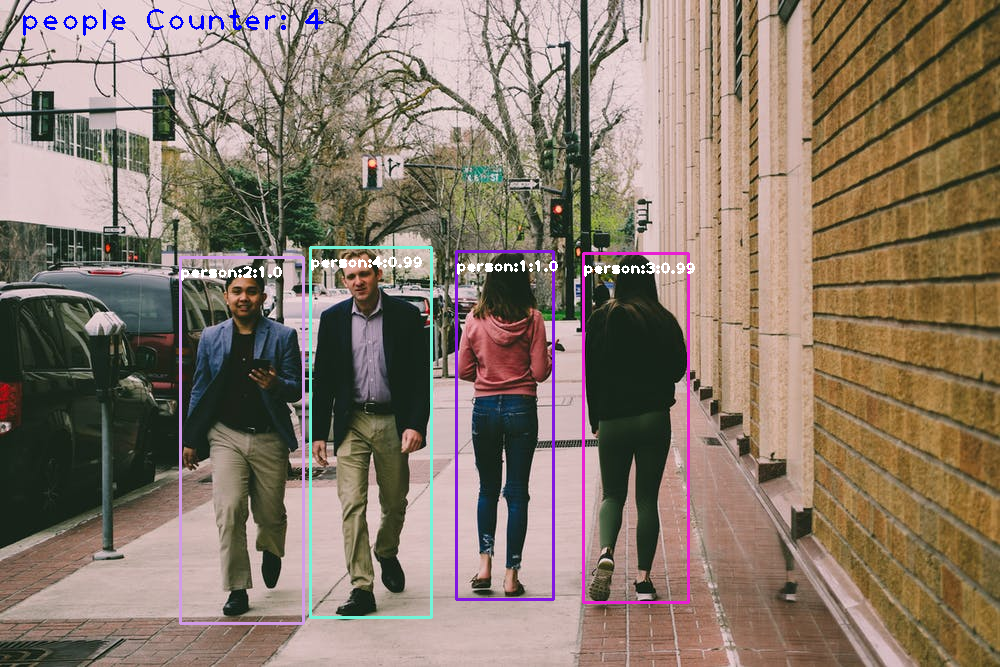

In [31]:
img = cv2.imread('//content/pexels-photo-1000754.jpeg')

People_Count(img)